In [1]:
import pandas as pd
import numpy as np
from dtg_utils import *
from draw_1_hop import *

In [2]:
embedding = pd.read_csv('../../results/data/mult-omics/multi_omics.emb',
                                    sep=' ',
                                    skiprows=1,
                                    header=None,
                                    index_col=0)

In [14]:
index = pd.read_csv('../../results/data/mult-omics/index_tracker.tsv',
                                sep='\t')
MEP_index = index[['Gene', 'MEP_0_network','Ery_0_network', 'Ery_1_network', 'Ery_2_network', 'Ery_3_network', 'Ery_4_network', 'Ery_5_network',
                  'Ery_6_network', 'Ery_7_network', 'Ery_8_network', 'Ery_9_network']].dropna()
GMP_index = index[['Gene', 'GMP_0_network', 'GMP_1_network', 'GMP_2_network', 'Gran_0_network', 'Gran_1_network',
                  'Gran_2_network', 'Gran_3_network']].dropna()

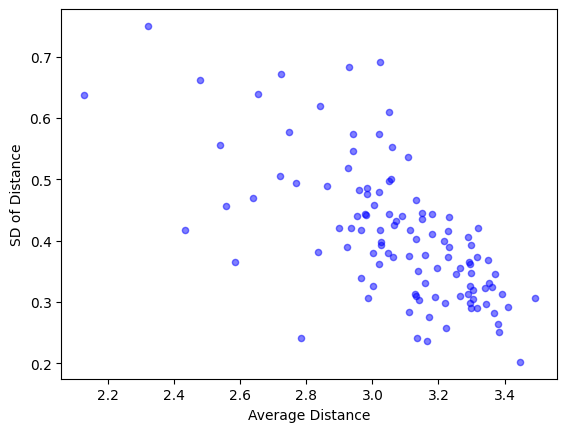

In [15]:
distance = cal_node_distances(index, embedding)
distance = distance.sort_values(by='distance_sd', ascending=False)
distance.to_csv('../../results/result2/multiomics_exp331.txt', sep='\t', index=False)

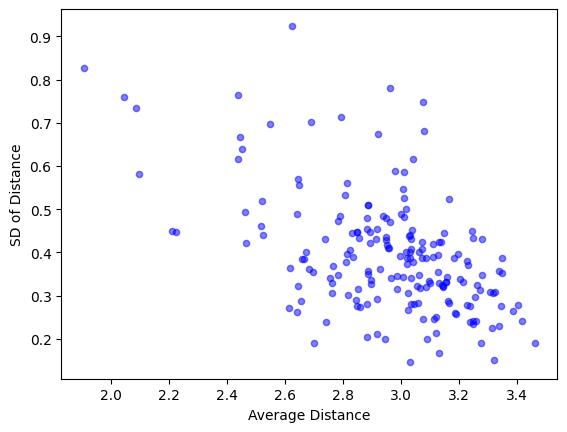

In [16]:
MEP_distance = cal_node_distances(MEP_index, embedding)
MEP_distance = MEP_distance.sort_values(by='distance_sd', ascending=False)
MEP_distance.to_csv('../../results/result2/multiomics_exp331_mep.txt', sep='\t', index=False)

In [17]:
MEP_distance

,Gene,MEP_0_network,Ery_0_network,Ery_1_network,Ery_2_network,Ery_3_network,Ery_4_network,Ery_5_network,Ery_6_network,Ery_7_network,Ery_8_network,Ery_9_network,distance_avg,distance_sd
312,E2f4,5798.0,10363.0,616.0,6350.0,11474.0,2386.0,7508.0,13248.0,4106.0,1175.0,9235.0,2.625398,0.924407
1185,Zbtb7a,5801.0,10379.0,613.0,6362.0,11472.0,2383.0,7492.0,13200.0,4114.0,1171.0,9234.0,1.907762,0.826036
1105,Top2a,5883.0,10437.0,685.0,6409.0,11545.0,2444.0,7547.0,13276.0,4183.0,1232.0,9291.0,2.961554,0.779955
916,Rpl23,5908.0,10443.0,688.0,6408.0,11544.0,2450.0,7543.0,13270.0,4177.0,1233.0,9289.0,2.438273,0.764951
599,Malat1,5896.0,10450.0,703.0,6483.0,11575.0,2446.0,7548.0,13279.0,4214.0,1235.0,9313.0,2.046593,0.760286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,Tagln2,5936.0,10586.0,780.0,6531.0,11941.0,2472.0,7587.0,13351.0,4269.0,1256.0,9309.0,3.461305,0.190599
45,Acsl5,6171.0,10587.0,817.0,6434.0,11573.0,2568.0,7669.0,13346.0,4333.0,1411.0,9462.0,2.701985,0.190558
389,Foxo1,5837.0,10401.0,676.0,6369.0,11502.0,2371.0,7511.0,13237.0,4175.0,1221.0,9261.0,3.131600,0.166889
596,Lyar,5998.0,10445.0,690.0,6429.0,11550.0,2614.0,7589.0,13297.0,4260.0,1234.0,9300.0,3.320520,0.149897


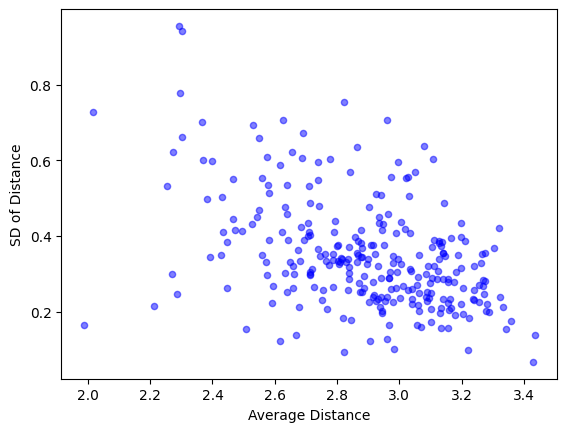

In [18]:
GMP_distance = cal_node_distances(GMP_index, embedding)
GMP_distance = GMP_distance.sort_values(by='distance_sd', ascending=False)
GMP_distance.to_csv('../../results/result2/multiomics_exp331_gmp.txt', sep='\t', index=False)

In [8]:
edgelist_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/data/mult-omics/multi_omics.edgelist'

edgelist = pd.read_csv(edgelist_path, sep='\t', header=None)
edgelist_list = edgelist.iloc[:, :2].stack().unique().tolist()

### Ploting nodes with largest SD or Mean in during MEP or GMP

#### MEP

In [9]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/MEP_network/mean/'
MEP_distance_sort_mean = MEP_distance.sort_values('distance_avg', ascending = False)
rows_index_list = [row[0:12].tolist() for index, row in MEP_distance_sort_mean.head(5).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)

In [10]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/MEP_network/sd/'
MEP_distance_sort_sd = MEP_distance.sort_values('distance_sd', ascending = False)
rows_index_list = [row[0:12].tolist() for index, row in MEP_distance_sort_sd.head(5).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)

#### GMP

In [11]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/GMP_network/mean/'
GMP_distance_sort_mean = GMP_distance.sort_values('distance_avg', ascending = False)
rows_index_list = [row[0:8].tolist() for index, row in GMP_distance_sort_mean.head(5).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)

In [12]:
output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/GMP_network/sd/'
GMP_distance_sort_sd = GMP_distance.sort_values('distance_sd', ascending = False)
rows_index_list = [row[0:8].tolist() for index, row in GMP_distance_sort_sd.head(5).iterrows()]

for index_list in rows_index_list:
    batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)

In [13]:
print(rows_index_list)

[['Smarca5', 8164.0, 3026.0, 3566.0, 5310.0, 12080.0, 8645.0, 1804.0], ['Nr3c1', 8123.0, 3019.0, 3565.0, 5261.0, 12079.0, 8646.0, 1776.0], ['Bdp1', 8132.0, 3011.0, 3571.0, 5300.0, 12098.0, 8652.0, 1782.0], ['Prtn3', 8214.0, 3100.0, 3651.0, 5345.0, 12225.0, 8799.0, 2189.0], ['Nfic', 8160.0, 3059.0, 3577.0, 5268.0, 12125.0, 8685.0, 1810.0]]


In [ ]:

# output_path = '/Users/xinzeng/Desktop/research/role_singlecell/results/result2/MEP_network/mean/'
# MEP_distance_sort_mean = MEP_distance.sort_values('distance_avg', ascending = True)
# rows_index_list = [row[0:12].tolist() for index, row in MEP_distance_sort_mean.head(5).iterrows()]

# for index_list in rows_index_list:
#     batch_plot_1_hop(edgelist_path,index_list[1:],output_path,index_list[0], edgelist_list)